In [1]:
#!pip install scipy==1.12

In [2]:
# Import necessary libraries
from numpy import triu
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
from gensim.models import Word2Vec
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matteorigat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matteorigat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Define the list of cooking techniques
TECHNIQUES_LIST = [
    'bake', 'boil', 'braise', 'broil', 'fry', 'grill', 'roast', 'saute', 'simmer',
    'steam', 'stew'
]

# Define a new technique mapping based on TECHNIQUES_LIST
technique_mapping = {
    'bake': 'bake',
    'barbecue': 'grill',
    'blanch': 'boil',
    'blend': 'combine',
    'boil': 'boil',
    'braise': 'braise',
    'brine': 'marinate',
    'broil': 'broil',
    'caramelize': 'saute',
    'combine': 'combine',
    'crock pot': 'slow cook',
    'crush': 'puree',
    'deglaze': 'saute',
    'devein': 'prepare',
    'dice': 'prepare',
    'distill': 'boil',
    'drain': 'boil',
    'emulsify': 'mix',
    'ferment': 'bake',
    'freeze': 'refrigerate',
    'fry': 'fry',
    'grate': 'saute',
    'griddle': 'prepare',
    'grill': 'grill',
    'knead': 'prepare',
    'leaven': 'bake',
    'marinate': 'marinate',
    'mash': 'stew',
    'melt': 'melt',
    'microwave': 'stew',
    'parboil': 'bake',
    'pickle': 'pickling',
    'poach': 'stew',
    'pour': 'combine',
    'pressure cook': 'bake',
    'puree': 'puree',
    'refrigerate': 'refrigerate',
    'roast': 'roast',
    'saute': 'saute',
    'scald': 'fry',
    'scramble': 'combine',
    'shred': 'puree',
    'simmer': 'simmer',
    'skillet': 'saute',
    'slow cook': 'slow cook',
    'smoke': 'grill',
    'smooth': 'stew',
    'soak': 'bake',
    'sous-vide': 'combine',
    'steam': 'steam',
    'stew': 'stew',
    'strain': 'bake',
    'tenderize': 'fry',
    'thicken': 'boil',
    'toast': 'grill',
    'toss': 'stew',
    'whip': 'grill',
    'whisk': 'stew'
}

In [4]:
file_path = "dataset/RAW_merged.csv"
data = pd.read_csv(file_path)

In [5]:
# # Function to convert one-hot encoded techniques back to list format
# def one_hot_to_list(row):
#     techniques_one_hot = eval(row['techniques'])
#     techniques_list = [TECHNIQUES_LIST[i] for i, val in enumerate(techniques_one_hot) if val == 1]
#     return techniques_list
# 
# # Apply the function to each row to convert one-hot encoded techniques to list format
# data['techniques'] = data.apply(one_hot_to_list, axis=1)

In [6]:
# Initialize lists to store raw ingredients and techniques
raw_ingredients = []
raw_techniques = []

# Extract ingredients and techniques from each recipe
for index, row in data.iterrows():
    ingredients = eval(row['ingredients'])
    raw_ingredients.extend(ingredients)

    techniques = eval(row['techniques_list'])
    raw_techniques.extend(techniques)

In [7]:
# Clean out non-letter or space symbols and collapse the list into a collection of ingredients
# regex = re.compile('[^a-zA-Z ]')
# ingredients_full = [regex.sub('', item.lower()).strip() for item in raw_ingredients]
# raw_ingredients = np.unique(ingredients_full)
# print(len(raw_ingredients))
# for item in raw_ingredients:
#    print(item)

In [8]:
# Look at words in the data to clean unnecessary differentiators
# words=[x for item in raw_ingredients for x in item.split(' ') if len(x)>1]
# for word in words:
#    print(word)

In [9]:
# Construct a frequence dictionary and create a dataset of words to drop
# uniqueFrequencies = {i:words.count(i) for i in words}
# dropWords=[k for k in uniqueFrequencies.keys() if uniqueFrequencies[k]==1]\
# +['yellow','black','red','green','white','purple','cloves','and','cook','drain','allpurpose','purpose','all','pitted','crumbles','powder', 'whole', 'extract', 'sweet', 'baby', 'bakin', 'brow', 'canned', 'celery']
# len(dropWords)

In [10]:
# Count frequencies of ingredients and techniques
ingredient_counts = Counter(raw_ingredients)
technique_counts = Counter(raw_techniques)

In [11]:
# Print out statistics
print('Total number of unique ingredients:', len(ingredient_counts))
print('Total number of unique techniques:', len(technique_counts))

# Example of how to print the most common ingredients
print('\nTop most common ingredients:')
for ingredient, count in ingredient_counts.most_common(1000):
    print(f'{ingredient}: {count}')
# 
# # Example of how to print the most common techniques
# print('\nTop 10 most common techniques:')
# for technique, count in technique_counts.most_common(10):
#     print(f'{technique}: {count}')

# # Assuming you also want to print out the distribution of cuisines based on the number of steps
# steps_counts = Counter(data['steps'].apply(lambda x: len(eval(x))))
# print('\nDistribution of recipes based on number of steps:')
# for steps, count in steps_counts.items():
#     print(f'{steps} steps: {count} recipes')


Total number of unique ingredients: 13627
Total number of unique techniques: 57

Top most common ingredients:
salt: 66469
butter: 43862
sugar: 33884
onion: 31624
water: 25953
eggs: 25636
olive oil: 25598
flour: 20672
milk: 20035
garlic cloves: 19506
pepper: 18522
brown sugar: 15217
garlic: 14312
baking powder: 13650
egg: 13428
salt and pepper: 12625
all-purpose flour: 12575
parmesan cheese: 11921
baking soda: 11276
lemon juice: 11185
vanilla: 10629
vegetable oil: 10593
black pepper: 10077
cinnamon: 9958
tomatoes: 9583
sour cream: 9222
garlic powder: 8535
oil: 7927
garlic clove: 7843
cheddar cheese: 7639
celery: 7547
onions: 7512
cream cheese: 7433
honey: 7414
vanilla extract: 7356
soy sauce: 7043
mayonnaise: 6967
chicken broth: 6332
worcestershire sauce: 6221
paprika: 6185
fresh parsley: 6145
extra virgin olive oil: 5650
cornstarch: 5597
parsley: 5494
bacon: 5468
unsalted butter: 5414
chili powder: 5406
carrots: 5320
potatoes: 5272
carrot: 5238
fresh ground black pepper: 5194
ground ci

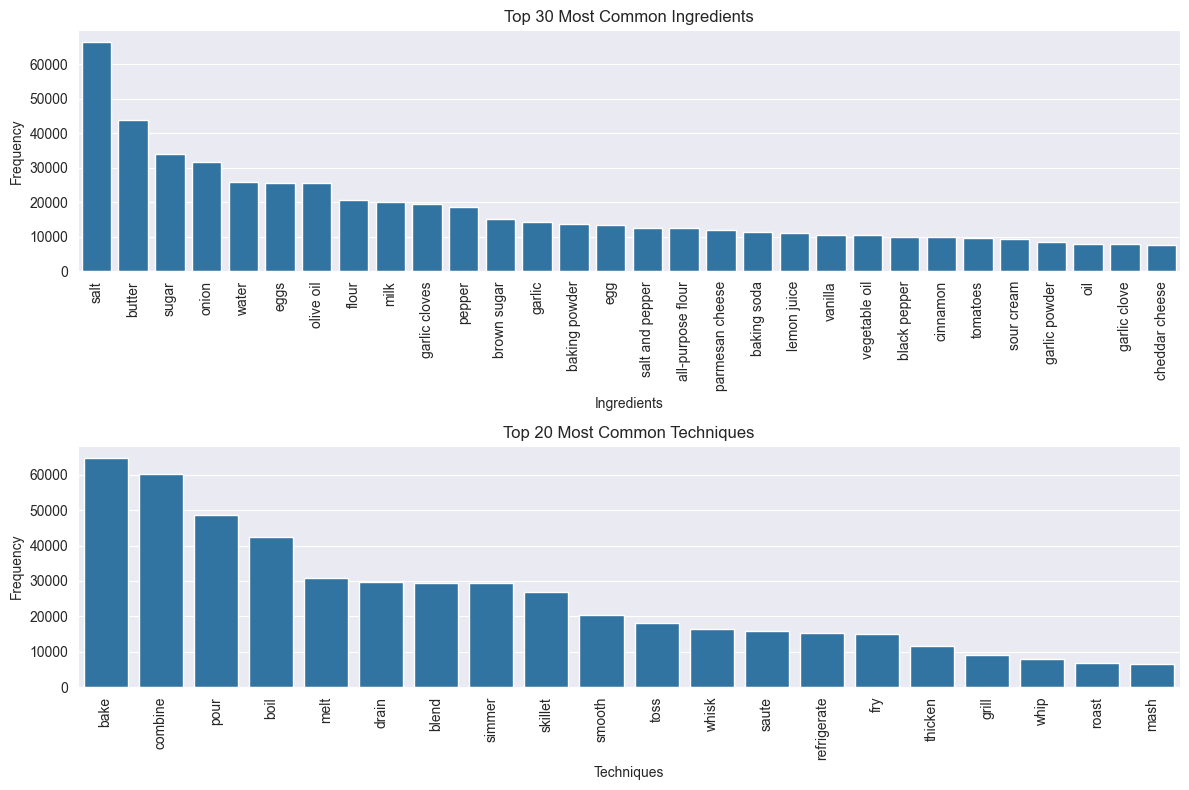

In [12]:
# Plotting the first bar plot for ingredients
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.subplot(2, 1, 1)  # Create subplot 1 (rows, columns, plot_number)
x_cu = [cu for cu, frq in ingredient_counts.most_common(30)]
y_frq = [frq for cu, frq in ingredient_counts.most_common(30)]
fbar = sns.barplot(x=x_cu, y=y_frq)
plt.xticks(rotation=90)  # Rotate x-axis labels

# Adding labels and title for the first subplot
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Ingredients')

# Plotting the second bar plot for techniques
plt.subplot(2, 1, 2)  # Create subplot 2 (rows, columns, plot_number)
x_cu2 = [cu for cu, frq in technique_counts.most_common(20)]
y_frq2 = [frq for cu, frq in technique_counts.most_common(20)]
fbar2 = sns.barplot(x=x_cu2, y=y_frq2)
plt.xticks(rotation=90)  # Rotate x-axis labels

# Adding labels and title for the second subplot
plt.xlabel('Techniques')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Techniques')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [13]:
# Initialize a defaultdict to store the number of ingredients per technique
num_ingredients = defaultdict(list)

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    techniques = eval(row['techniques_list'] ) # Access techniques directly as a list
    ingredients = eval(row['ingredients'])  # Evaluate the ingredients string to a list
    
    for technique in techniques:
        num_ingredients[technique].append(ingredients)

# Print the number of techniques (unique keys in num_ingredients)
print(f"Number of techniques: {len(num_ingredients)}\n")


# Iterate through num_ingredients and print the number of recipes per technique
count = 0
for technique, ingredient_lists in num_ingredients.items():
    print(f"{technique}: {len(ingredient_lists)} recipes")
    count += 1
    if count == 5:
        break

Number of techniques: 57

bake: 64821 recipes
grate: 5584 recipes
melt: 30865 recipes
pour: 48747 recipes
whisk: 16467 recipes


In [14]:
sentences = []
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
regex = re.compile('[^a-zA-Z ]')

# Define common ingredients to filter out
#common_ingredients_to_avoid = ['salt', 'sugar', 'water', 'pepper', 'butter', 'onion', 'garlic', 'oil', 'parsley']
common_ingredients_to_avoid = []

# Function to clean and filter ingredients
def clean_ingredient(ingredient):
    cleaned_ingredient = regex.sub('', ingredient.lower()).strip()
    cleaned_words = []
    
    for word in cleaned_ingredient.split():
        if word in common_ingredients_to_avoid:
            cleaned_words = []
            break
        elif len(word) > 2 and word not in stop_words:
            cleaned_words.append(lemmatizer.lemmatize(word))
    
    return cleaned_words

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    clean_recipe = []
    ingredients = eval(row['ingredients'])
    
    for ingredient in ingredients:
        cleaned_words = clean_ingredient(ingredient)
        if cleaned_words:  # Check if cleaned_words is not empty
            clean_recipe.append(" ".join(cleaned_words))
        
    sentences.append(clean_recipe)

# Print the number of recipes processed
print(f"Number of recipes cleaned: {len(sentences)}")
print(sentences[:5])

Number of recipes cleaned: 178265
[['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt'], ['prepared pizza crust', 'sausage patty', 'egg', 'milk', 'salt pepper', 'cheese'], ['spreadable cheese garlic herb', 'new potato', 'shallot', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper'], ['milk', 'vanilla ice cream', 'frozen apple juice concentrate', 'apple'], ['fennel seed', 'green olive', 'ripe olive', 'garlic', 'peppercorn', 'orange rind', 'orange juice', 'red chile', 'extra virgin olive oil']]


In [15]:
# Flatten the list of lists
ingredients_corpus = [ingredient for sublist in sentences for ingredient in sublist]

# Tokenize each ingredient (assuming simple split by space)
tokenized_corpus = [ingredient.split() for ingredient in ingredients_corpus]

# Set values for Word2Vec parameters
num_features = 100     # Example dimensionality of word vectors
min_word_count = 1     # Consider all words, even if they appear only once
num_workers = 4        # Number of threads to run in parallel
context = 5            # Context window size

# Train the Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=num_features, min_count=min_word_count, workers=num_workers, window=context)

# Create a dictionary to store word vectors
ingredient_vectors = {}
for ingredient in ingredients_corpus:
    words = ingredient.split()
    if words:
        ingredient_vectors[ingredient] = np.mean([model.wv[word] for word in words], axis=0)

# Normalize the vectors using MinMaxScaler
scaler = MinMaxScaler()
scaled_vectors = scaler.fit_transform(list(ingredient_vectors.values()))

# Print scaled vectors
# for ingredient, vector in zip(ingredient_vectors.keys(), scaled_vectors):
#    print(f"{ingredient}: {vector}")

In [16]:
print(model.wv.similarity('spaghetti', 'pasta'))

0.5580768


In [17]:
similar_ingredients = model.wv.most_similar('spaghetti')
print('Ingredients most similar to milk:')
for ingredient, score in similar_ingredients:
    print(f'{ingredient}: {score}')

Ingredients most similar to milk:
bearnaise: 0.7178006768226624
jus: 0.683236837387085
hollandaise: 0.6701731085777283
worcestershire: 0.6698896884918213
marinara: 0.6639872193336487
oyster: 0.6615847945213318
chiligarlic: 0.6510224342346191
hoisin: 0.6446425914764404
browning: 0.6429833173751831
sofrito: 0.6406143307685852


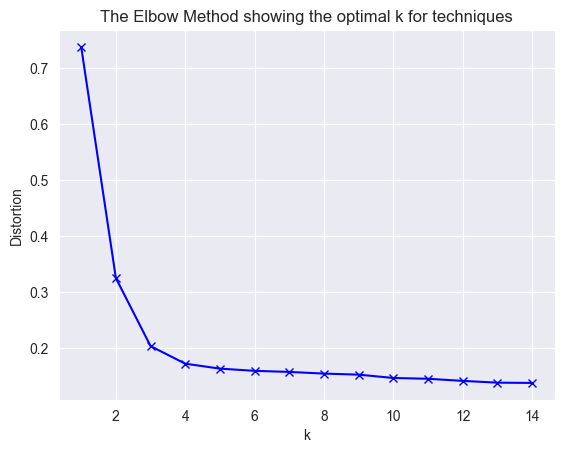

Technique Cluster assignments:
bake: Cluster 6
grate: Cluster 10
melt: Cluster 8
pour: Cluster 4
whisk: Cluster 4
boil: Cluster 7
dice: Cluster 7
drain: Cluster 6
blend: Cluster 9
combine: Cluster 0
smooth: Cluster 8
crush: Cluster 9
marinate: Cluster 9
refrigerate: Cluster 5
toast: Cluster 0
freeze: Cluster 0
whip: Cluster 7
simmer: Cluster 7
crock pot: Cluster 2
skillet: Cluster 4
fry: Cluster 7
toss: Cluster 7
puree: Cluster 6
saute: Cluster 7
thicken: Cluster 10
slow cook: Cluster 3
deglaze: Cluster 5
grill: Cluster 6
smoke: Cluster 9
strain: Cluster 0
mash: Cluster 7
pickle: Cluster 9
soak: Cluster 4
stew: Cluster 5
knead: Cluster 5
microwave: Cluster 6
roast: Cluster 4
steam: Cluster 6
broil: Cluster 0
shred: Cluster 8
scramble: Cluster 6
barbecue: Cluster 5
caramelize: Cluster 4
scald: Cluster 7
devein: Cluster 6
griddle: Cluster 9
parboil: Cluster 9
emulsify: Cluster 7
braise: Cluster 10
blanch: Cluster 4
brine: Cluster 7
pressure cook: Cluster 1
ferment: Cluster 5
poach: Clust

In [18]:
# Group techniques to form corpus
technique_corpus = [[technique] for technique in raw_techniques]

# Tokenize each technique
tokenized_techniques = [technique.split() for technique in raw_techniques]

# Train the Word2Vec model for techniques
technique_model = Word2Vec(tokenized_techniques, vector_size=num_features, min_count=min_word_count, workers=num_workers, window=context)

# Create a dictionary to store technique vectors
technique_vectors = {technique: np.mean([technique_model.wv[word] for word in technique.split()], axis=0) for technique in raw_techniques}

# Normalize the technique vectors
scaled_technique_vectors = scaler.fit_transform(list(technique_vectors.values()))

# Elbow method to determine the optimal number of clusters for techniques
distortions = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_technique_vectors)
    distortions.append(sum(np.min(cdist(scaled_technique_vectors, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_technique_vectors.shape[0])

# Plot the elbow for techniques
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for techniques')
plt.show()

# Perform KMeans clustering on techniques
num_clusters_techniques = len(TECHNIQUES_LIST)
kmeans_technique_clustering = KMeans(n_clusters=num_clusters_techniques)
technique_idx = kmeans_technique_clustering.fit_predict(scaled_technique_vectors)

# Assign clusters to techniques
technique_assignments = list(zip(technique_vectors.keys(), technique_idx))
print('Technique Cluster assignments:')
for technique, cluster in technique_assignments:
    print(f'{technique}: Cluster {cluster}')

In [19]:
technique_cluster_map = {technique: cluster for technique, cluster in technique_assignments}

ingredients_per_technique_cluster = defaultdict(list)
techniques_per_technique_cluster = defaultdict(list)

for index, row in data.iterrows():
    ingredients = eval(row['ingredients'])
    techniques = eval(row['techniques_list'])
    for technique in techniques:
        cluster = technique_cluster_map.get(technique)
        if cluster is not None:
            ingredients_per_technique_cluster[cluster].extend(ingredients)
            techniques_per_technique_cluster[cluster].extend(techniques)

dominant_techniques_per_cluster = {cluster: Counter(techniques).most_common(1)[0][0] for cluster, techniques in
                                   techniques_per_technique_cluster.items()}
cluster_to_method = {cluster: technique for cluster, technique in dominant_techniques_per_cluster.items()}

ingredient_cluster_map = {ingredient: kmeans_technique_clustering.predict(
    scaler.transform([np.mean([model.wv[word] for word in ingredient.split()], axis=0)]))[0] for ingredient in
                          ingredients_corpus}

In [20]:
def clean_ingredient(ingredient):
    cleaned_ingredient = regex.sub('', ingredient.lower()).strip()
    cleaned_words = []
    
    for word in cleaned_ingredient.split():
        if word in common_ingredients_to_avoid:
            cleaned_words = []
            break
        elif len(word) > 2 and word not in stop_words:
            cleaned_words.append(lemmatizer.lemmatize(word))
    
    return cleaned_words

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
import numpy as np

# Load pre-trained Word2Vec model
# model = KeyedVectors.load_word2vec_format('path/to/GoogleNews-vectors-negative300.bin', binary=True)

KEY_INGREDIENTS = [
    'chicken', 'beef', 'pork', 'fish', 'shrimp', 'lobster', 'crab', 
    'tofu', 'egg', 'pasta', 'rice', 
    'tomato', 'carrot', 'mushroom', 'milk',
]

# Generate embeddings for key ingredients
key_ingredient_embeddings = {ingredient: model.wv[ingredient] for ingredient in KEY_INGREDIENTS if ingredient in model.wv}

def get_dominant_cooking_methods(ingredients, ingredient_cluster_map, cluster_to_method, ingredient_counts):
    method_counts = Counter()
    
    # Clean and filter ingredients
    cleaned_ingredients = []
    for ingredient in ingredients:
        cleaned_words = clean_ingredient(ingredient)
        if cleaned_words:  # Check if cleaned_words is not empty
            cleaned_ingredients.append(" ".join(cleaned_words))
    
    # Calculate weights for each ingredient based on similarity to key ingredients
    weights = {}
    for ingredient in cleaned_ingredients:
        if ingredient in model.wv:
            ingredient_embedding = model.wv[ingredient]
            similarities = cosine_similarity(
                [ingredient_embedding], 
                [embedding for embedding in key_ingredient_embeddings.values()]
            )
            max_similarity = max(similarities[0])
            weights[ingredient] = max_similarity
        else:
            weights[ingredient] = 0
    
    # Manually adjust weights for key ingredients
    for ingredient in cleaned_ingredients:
        if ingredient in KEY_INGREDIENTS:
            weights[ingredient] = weights.get(ingredient, 0) + 3  # Add a higher weight for key ingredients
    
    # Normalize weights to ensure balance
    if weights:
        max_weight = max(weights.values())
        weights = {ingredient: (weight / max_weight) for ingredient, weight in weights.items()}
    
    # Calculate method counts using the mapped techniques
    for ingredient in cleaned_ingredients:
        cluster = ingredient_cluster_map.get(ingredient)
        if cluster is not None:
            method = cluster_to_method.get(cluster)
            if method:
                mapped_method = technique_mapping.get(method)
                if mapped_method:
                    method_counts[mapped_method] += weights[ingredient]
    
    # Normalize method counts
    if method_counts:
        max_count = max(method_counts.values())
        method_counts = {method: count / max_count for method, count in method_counts.items()}
    
    # Get top 3 methods from TECHNIQUES_LIST
    top_methods = sorted(method_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    
    # Determine the most important ingredient based on weights
    most_important_ingredient = max(cleaned_ingredients, key=lambda x: weights.get(x, 0))
    
    return [method for method, _ in top_methods], most_important_ingredient

In [22]:
# Example usage
ingredients_list_1 = ['chicken', 'potato', 'oil', 'water', 'butter', 'onion', 'garlic', 'salt', 'pepper', 'parsley']
dominant_methods_1, important_ingredient_1 = get_dominant_cooking_methods(ingredients_list_1, ingredient_cluster_map, cluster_to_method, ingredient_counts)
print(f"Top cooking methods for the given ingredients (emphasis on '{important_ingredient_1}'): {dominant_methods_1}")

ingredients_list_2 = ['pasta', 'tomato', 'onion', 'garlic', 'cheese', 'olive oil', 'basil', 'salt', 'pepper', 'parsley']
dominant_methods_2, important_ingredient_2 = get_dominant_cooking_methods(ingredients_list_2, ingredient_cluster_map, cluster_to_method, ingredient_counts)
print(f"Top cooking methods for the given ingredients (emphasis on '{important_ingredient_2}'): {dominant_methods_2}")


Top cooking methods for the given ingredients (emphasis on 'chicken'): ['bake', 'combine', 'boil']
Top cooking methods for the given ingredients (emphasis on 'tomato'): ['combine', 'boil', 'bake']
